

# Titanic tutorial with 유한님

* 자료 : https://kaggle-kr.tistory.com/17?category=868316

## 1. Set up

Library를 불러오고, 기본적인 설정값을 추가합니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno #null data를 시각화하기 위한 library

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
print(plt.style.available) #아래의 style을 적용할 수 있음.

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## 2. Dataset 확인

* 파이썬은 테이블 형태의 데이터를 다루는 데 최적화되어 있으며, `pandas`를 많이 사용합니다.
* 데이터 셋은 보통 train, test로 나눠져 있습니다.

In [3]:
df_train = pd.read_csv('../Downloads/Titanic_yohan/train.csv')
df_test = pd.read_csv('../Downloads/Titanic_yohan/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터에서 주어진 feature는 `'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'`이며, 예측하려는 target은 `Survived` 입니다.

In [5]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [6]:
#describe() 메소드를 이용해서 통계치를 반환.
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


`count`의 숫자가 다른 feature는 null data가 존재한다고 볼 수 있습니다.

### 2.1 Null data check

In [8]:
for col in df_train.columns:
    msg = 'column : {:<10}\t Percent of Nan value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
    
#{:<10} : 해당 공간을 10칸으로 지정, < : left에서 시작, > right에서 시작, \t : 공백 추가

column : PassengerId	 Percent of Nan value: 0.00%
column : Survived  	 Percent of Nan value: 0.00%
column : Pclass    	 Percent of Nan value: 0.00%
column : Name      	 Percent of Nan value: 0.00%
column : Sex       	 Percent of Nan value: 0.00%
column : Age       	 Percent of Nan value: 19.87%
column : SibSp     	 Percent of Nan value: 0.00%
column : Parch     	 Percent of Nan value: 0.00%
column : Ticket    	 Percent of Nan value: 0.00%
column : Fare      	 Percent of Nan value: 0.00%
column : Cabin     	 Percent of Nan value: 77.10%
column : Embarked  	 Percent of Nan value: 0.22%


`MANO` 라이브러리를 사용하면 Null data 가 존재하는 곳을 쉽게 볼 수 있습니다.

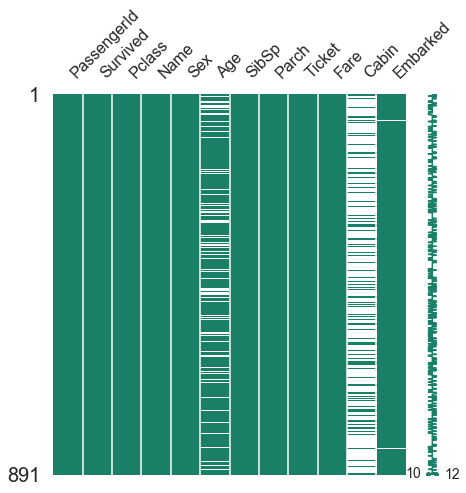

In [9]:
msno.matrix(df=df_train, figsize=(7,7), color=(0.1, 0.5, 0.4))

Text(0.5, 1.0, 'df_test Null bar')

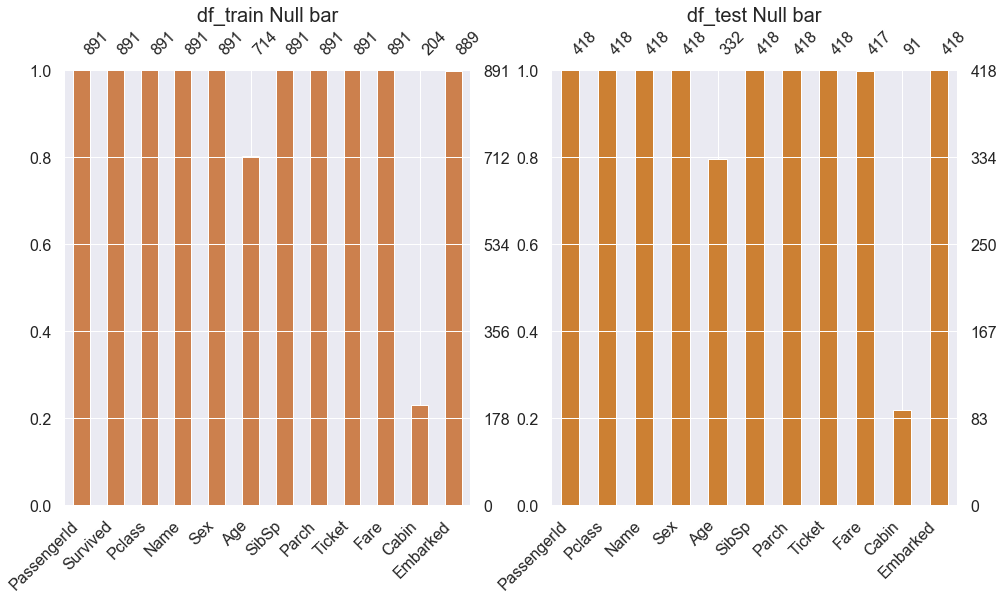

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

msno.bar(df=df_train, figsize=(8,8), color=(0.8, 0.5, 0.3), ax=ax[0])
ax[0].set_title('df_train Null bar', fontsize=20)
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2), ax=ax[1])
ax[1].set_title('df_test Null bar', fontsize=20)

### 1.2 Target Label 확인

* target label이 어떤 distribution을 가지고 있는지 확인해봐야 합니다.
* Binary classification 문제의경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

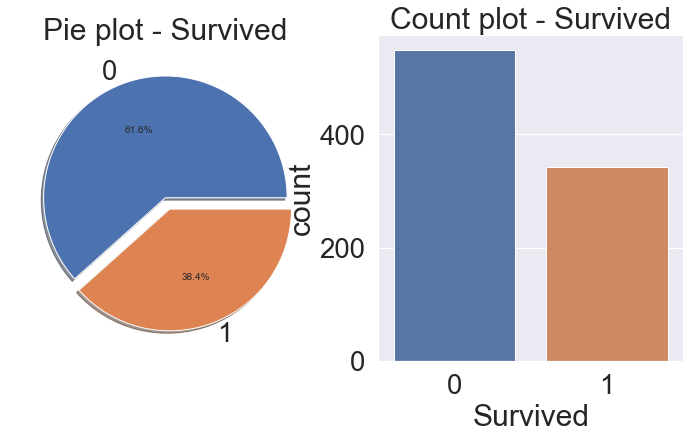

In [11]:
f, ax = plt.subplots(1,2, figsize=(12, 6))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* 전체 탑승객 중, 약 38.4%가 살아남았습니다.
* Target label의 경우, 분포가 제법 균일(balanced)합니다. 불균일(Unbalanced)한 경우(100개 중 0이 1개), 모든 것을 1로 예측해도 정확도가 99%가 나오게 됩니다. 따라서 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없습니다. 

## 2. Exploratory data

### 2.1 Pclass

* `Pclass`는 서수형 데이터입니다(범주형(categorical)이면서 순서가 있는 데이터).
* 먼저 `Pclass`에 따른 생존률의 차이를 살펴보겠습니다. `pandas datafame`에서는 `groupby`를 사용해서 피벗 차트와 유사한 작업을 할 수 있습니다.
* `Pclass`, `Survived`를 가져온 후, `Pclass`로 묶습니다.
* `as_index`로 index column을 설정합니다. 기본값은 True로 되어있습니다.

In [12]:
df_train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
#동시에 하면 .agg를 사용
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).agg(['mean', 'count', 'sum'])

Survived           
            mean count  sum
Pclass                     
1       0.629630   216  136
2       0.472826   184   87
3       0.242363   491  119

* `pandas.crosstab`을 사용하면 좀 더 보기쉽게 만들 수 있다.
* `margin`을 총 합(All) column을 생성할지 여부를 정함.

In [15]:
pd.crosstab(index =df_train['Pclass'], columns=df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* group된 객체에 mean 연산을 하게되면, 각 클래스별로 생존률을 얻을 수 있습니다.


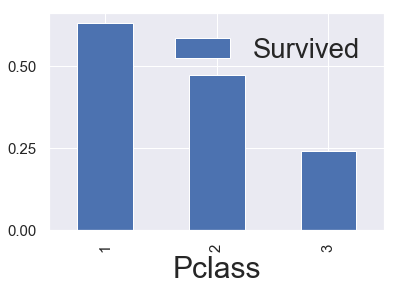

In [16]:
df_train[['Survived', 'Pclass']].groupby(['Pclass'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar(fontsize=15)

* 보다시피, Pclass가 좋을 수록 생종률이 높은 것을 볼 수 있습니다.

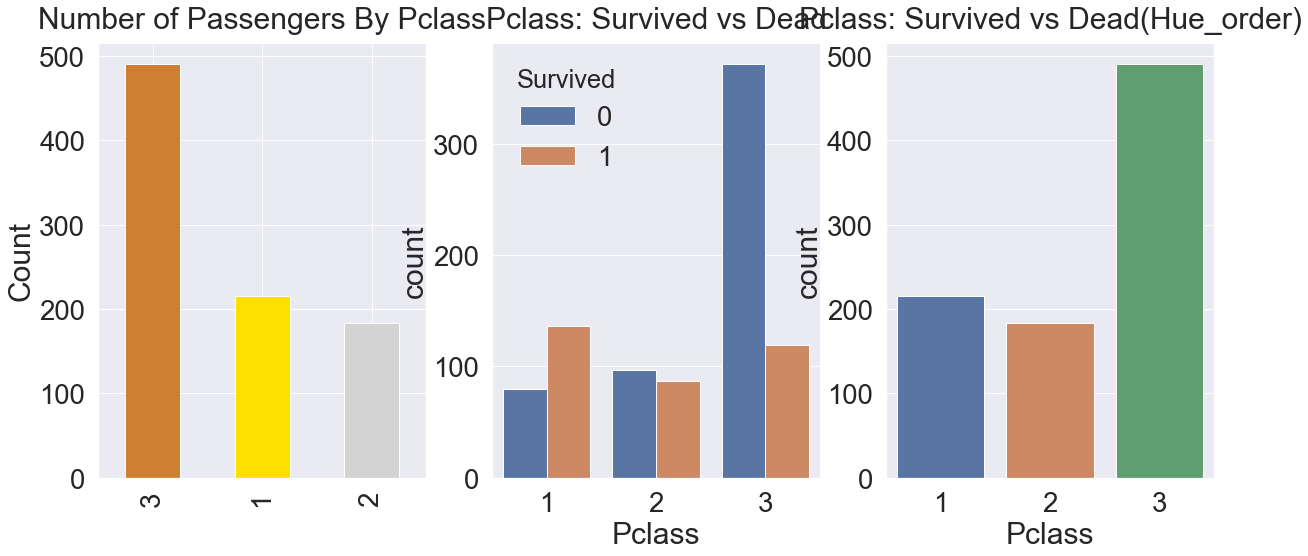

In [17]:
y_position = 1.02
f, ax = plt.subplots(1,3, figsize=(20, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot(df_train['Pclass'], hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

sns.countplot('Pclass', data=df_train, ax=ax[2])
ax[2].set_title('Pclass: Survived vs Dead(Hue_order)', y=y_position)
plt.show()

* 클래스가 높을 수록, 생존 확률이 높은 걸 학인할 수 있습니다. Pclass 1, 2, 3 순서대로 63%, 48%, 25% 입니다
* 우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단할 수 있습니다.

### 2.2 Sex

* 이번에는 성별로 생존률이 어떻게 달라지는 지 확인해보겠습니다.
* 마찬가지로 pandas groupby 와 seaborn countplot 을 사용해서 시각화해봅시다.

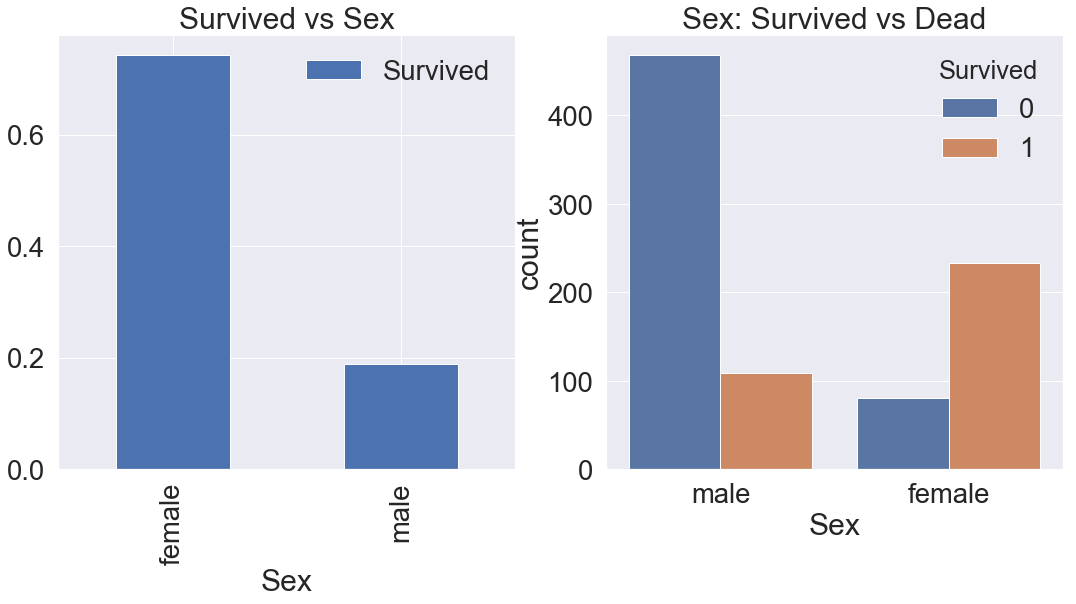

In [18]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

* 여자가 생존할 확률이 높습니다.

In [19]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values('Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


* Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있습니다

### 2.3 Both Sex and Pclass

* 이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다
* seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

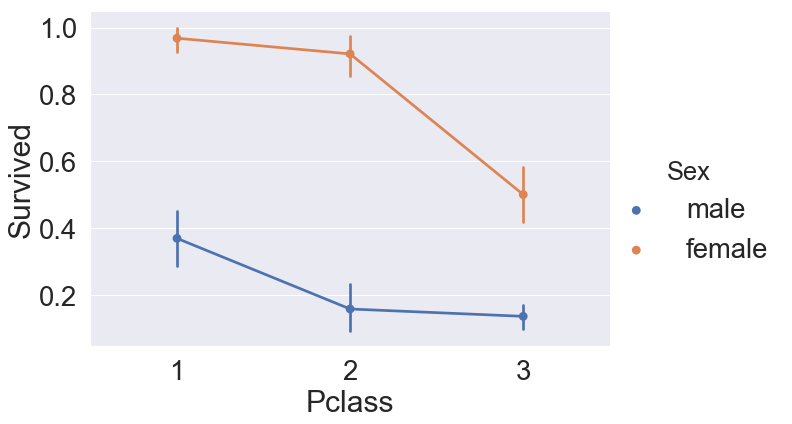

In [21]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

* 모든 클래스에서 female 이 살 확률이 male 보다 높은 걸 알 수 있습니다.
* 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률 높습니다.
* 위 그래프는 hue 대신 column 으로 하면 아래와 같아집니다

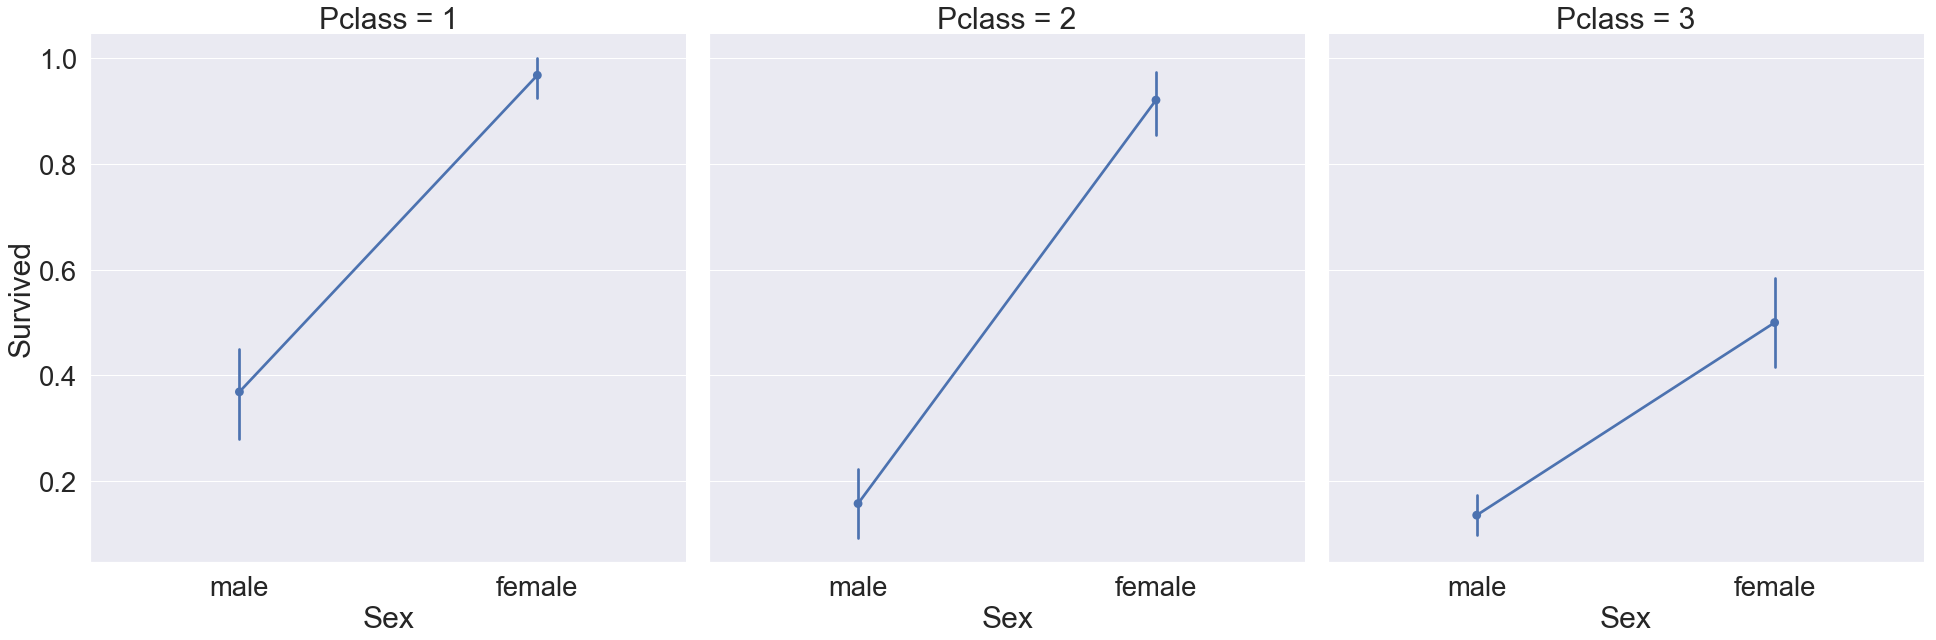

In [22]:
sns.factorplot(x = 'Sex' , y='Survived', col='Pclass', data=df_train, satureation=.5,
               size=9, aspect=1
              )

### 2.4 Age

In [23]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


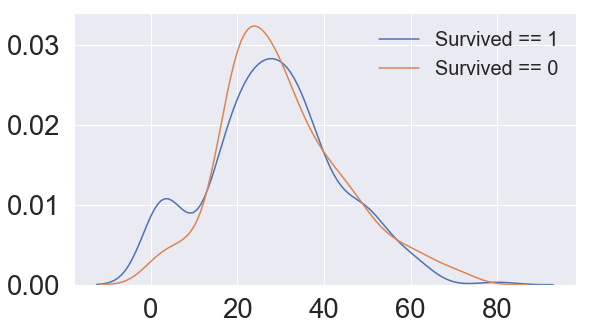

In [24]:
fig = plt.figure(figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'])
plt.legend(['Survived == 1', 'Survived == 0'], fontsize=20)
plt.show()

* 보시다시피, 생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

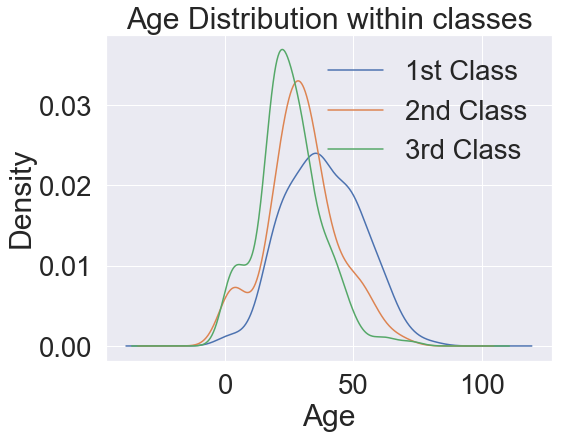

In [25]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

* lass 가 높을 수록 나이 많은 사람의 비중이 커짐
* 나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.
* 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

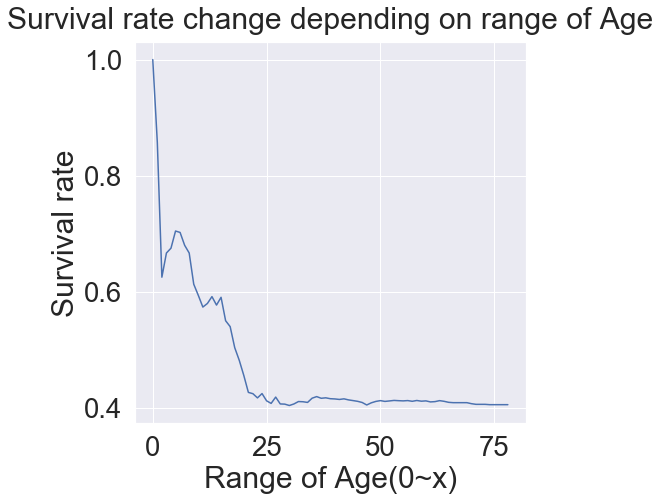

In [26]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 보시다시피, 나이가 어릴 수록 생존률이 확실히 높은것을 확인할 수 있습니다.
* 우리는 이 나이가 중요한 feature 로 쓰일 수 있음을 확인했습니다.

## 2.5 Pclass, Sex, Age

* 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 violinplot 입니다.
* x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.
* 한번 그려보겠습니다

* Violin Plot : 바이올린(violin)을 닮아서 붙여진 이름으로 카테고리 데이터의 분포를 시각적으로 잘 비교할 수 있는 차트이다. 데이터의 그룹을 하나의 그래프에 그려 줌으로써 데이터 그룹 간의 비교를 시각적으로 잘 표현해 준다.

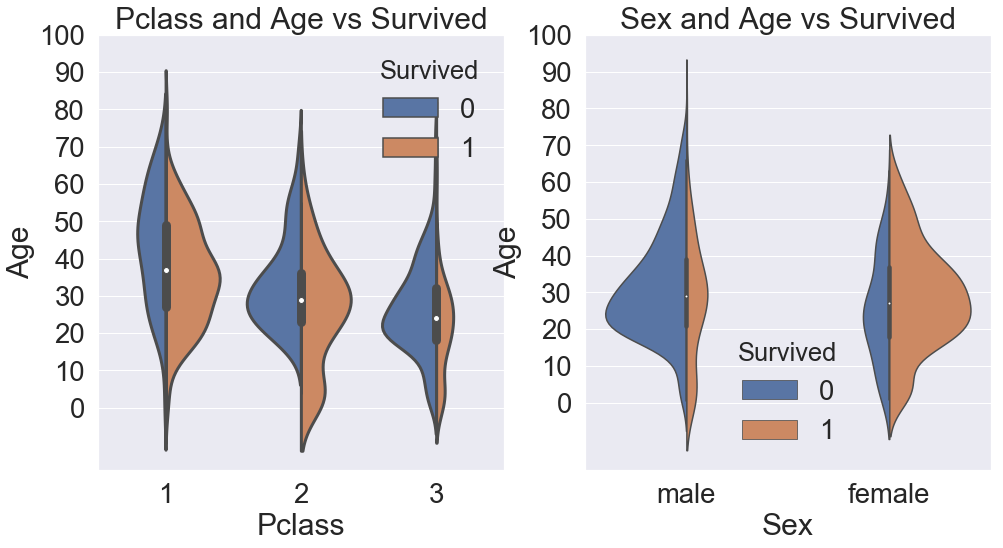

In [38]:
f, ax = plt.subplots(1,2, figsize=(16, 8))
sns.violinplot("Pclass", "Age", hue='Survived', data=df_train, scale='count', split=True, linewidth=3, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.
* 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어떻게 다른지 보여주는 그래프입니다.
* 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.
* 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.
* 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

### 2.6 Embarked

* Embarked 는 탑승한 항구를 나타냅니다.
* 위에서 해왔던 것과 비슷하게 탑승한 곳에 따르 생존률을 보겠습니다.

Text(0.5, 1.0, 'Embarked count plot')

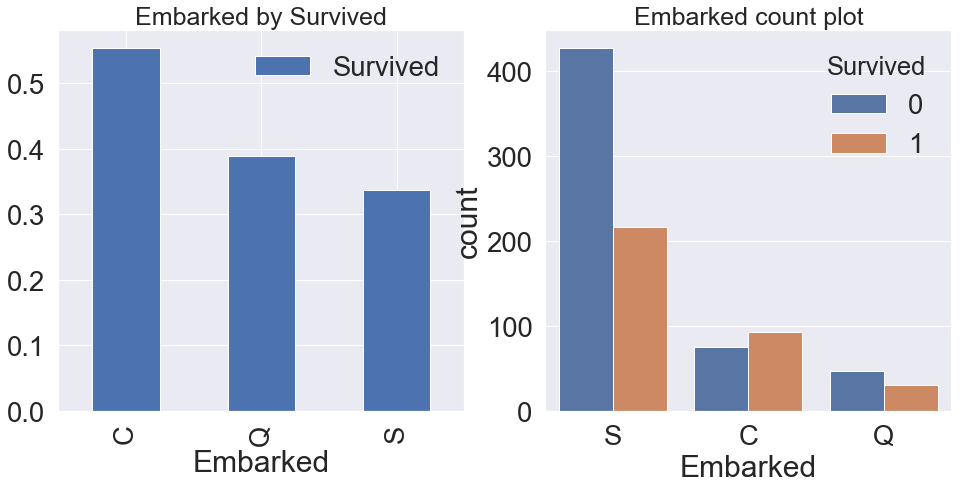

In [60]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
df_train[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values('Embarked', ascending=True).plot.bar(ax=ax[0])
ax[0].set_title('Embarked by Survived' ,fontsize=25)
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Embarked count plot', fontsize=25)

* 보시다시피, 조금의 차이는 있지만 생존률은 좀 비슷한 거 같습니다. 그래도 C가 제일 높군요.
* 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.
* 사실, 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.
* 다른 feature 로 split 하여 한번 살펴보겠습니다

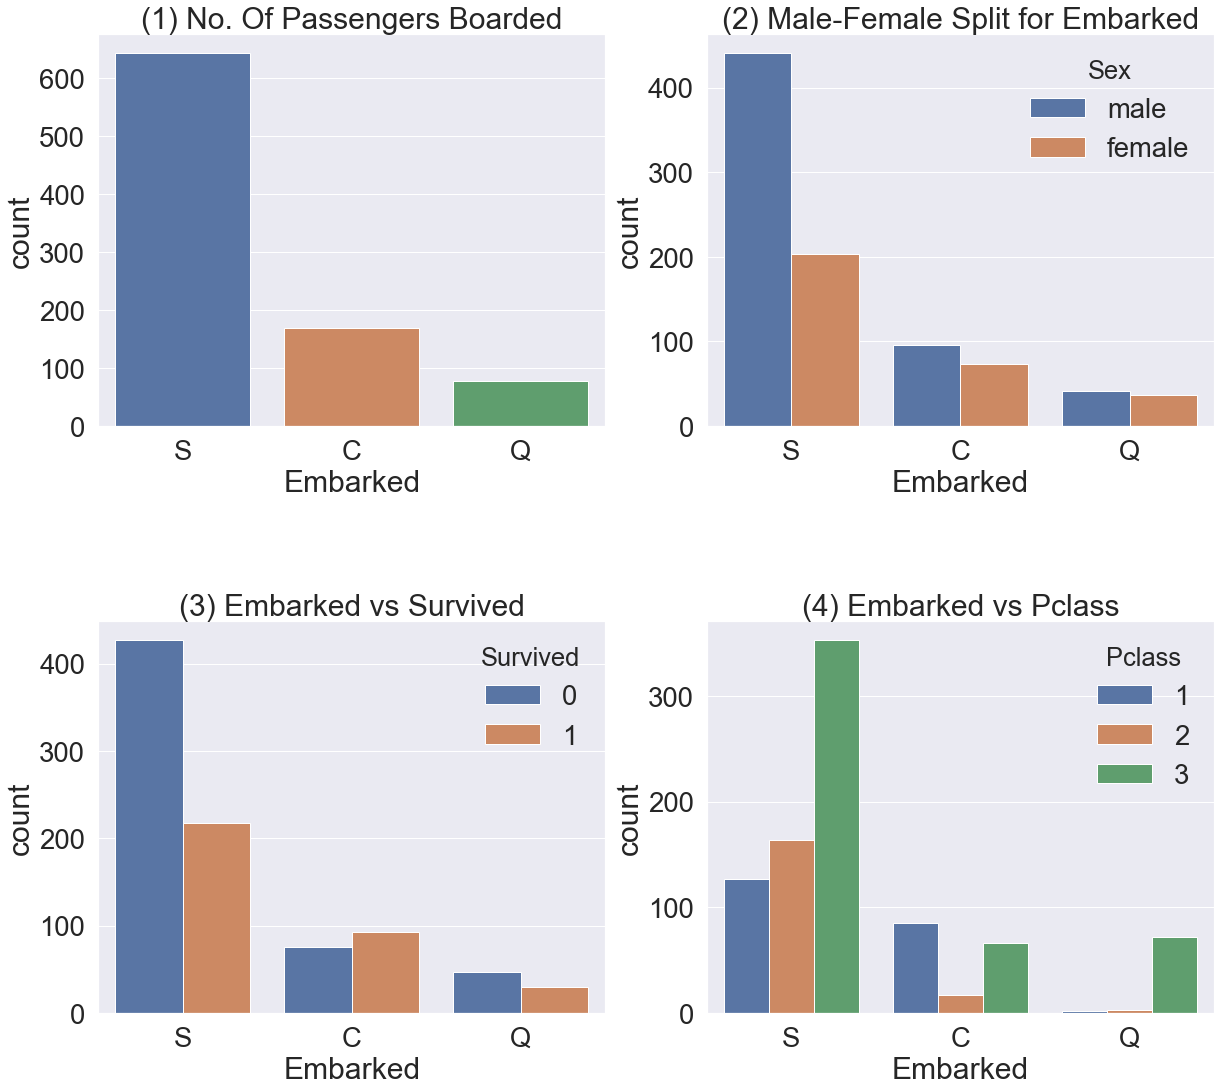

In [64]:
f, ax = plt.subplots(2,2, figsize=(20,18))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.
* Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
* Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다)
* Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class 가 많아서 생존확률이 낮게 나옵니다.

### 2.7 Family - SibSp(형제 자매) + Parch(부모 자녀)

* SibSp와 Parch를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해봅시다

In [65]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자신을 포함해야하므로 1을 더함.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [66]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


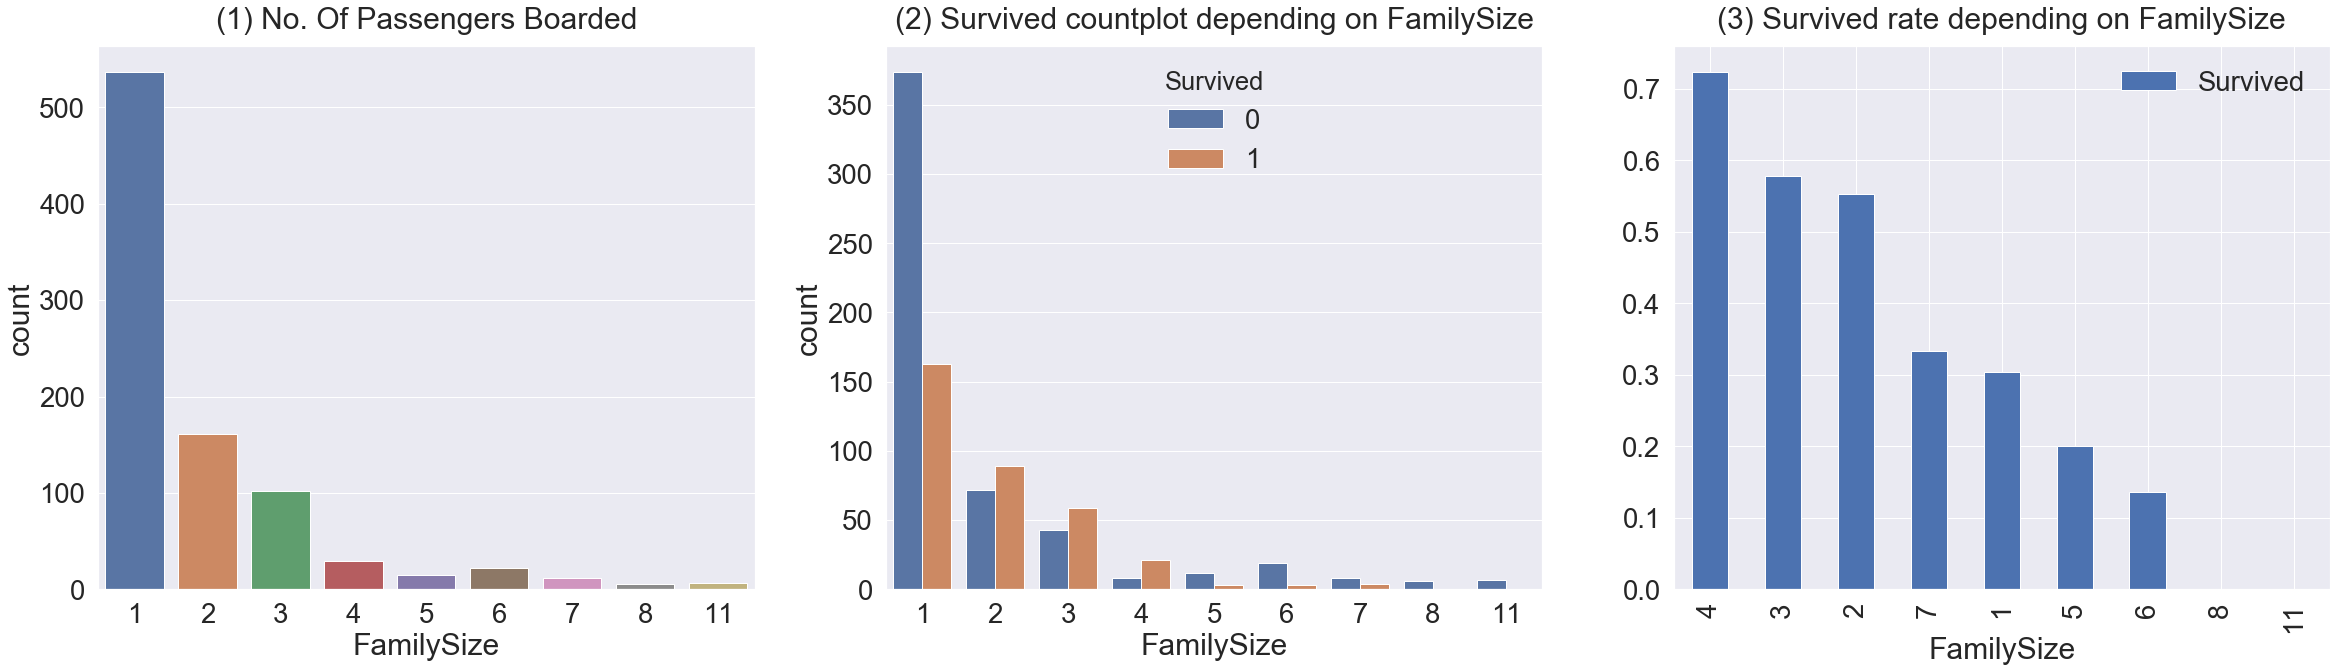

In [80]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)
sns.countplot('FamilySize', hue='Survived', data=df_train, ax= ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)
df_train[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values('Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
* Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.


### 2.8 Fare
* Fare 는 탑승요금이며, contious feature 입니다. 한번 histogram 을 그려보겠습니다.

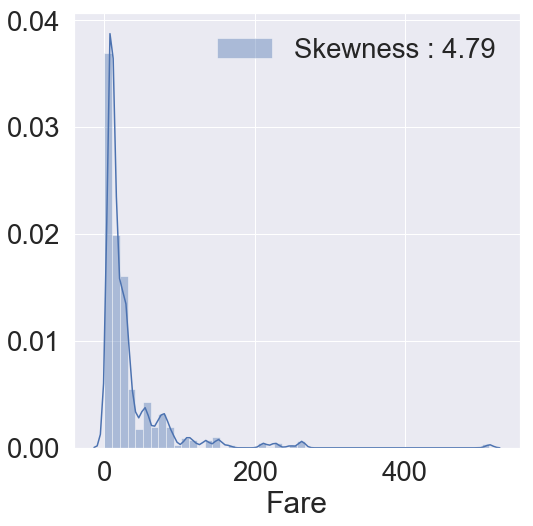

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.
* outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.
* 여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.
* 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!

In [85]:
df_train['Fare'].isnull().sum(), df_test['Fare'].isnull().sum()

(0, 1)

In [109]:
# 아래 줄은 뒤늦게 발견하였습니다. 13번째 강의에 언급되니, 일단 따라치시고 넘어가면 됩니다.
#df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.
df_test[df_test['Fare'].isnull()]['Fare'] = df_test['Pclass'].map(
    df_test[['Fare', 'Pclass']].groupby('Pclass')['Fare'].mean().round(4).to_dict())
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

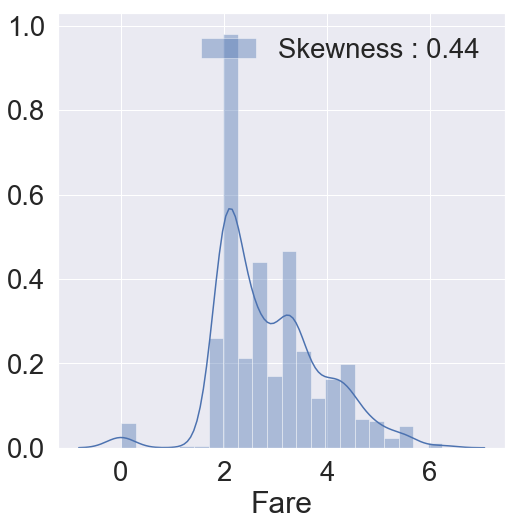

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
* 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
* 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.
* 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

### 2.9 Cabin

* 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.
* 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [147]:
#fig, ax = plt.subplots(1,1, figsize=(6,6))
#df_train.isnull().sum().plot.barh(figsize=(6,4), fontsize=15, ax=ax)
df_train.isnull().sum() / len(df_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
FamilySize     0.000000
dtype: float64

### 2.10 Ticket

이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [148]:
df_train['Ticket'].value_counts()

1601                 7
CA. 2343             7
347082               7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
W./C. 6608           4
2666                 4
349909               4
113760               4
347077               4
PC 17757             4
LINE                 4
4133                 4
113781               4
19950                4
17421                4
239853               3
29106                3
PC 17755             3
F.C.C. 13529         3
24160                3
345773               3
248727               3
35273                3
363291               3
347742               3
371110               3
                    ..
248747               1
347466               1
C.A. 29566           1
349222               1
315086               1
350035               1
350048               1
365226               1
2671                 1
14313                1
PC 17590             1
PC 17475             1
113784     